In [2]:
import taichi as ti
import numpy as np
import taichi.math as tm

[Taichi] version 1.6.0, llvm 15.0.1, commit f1c6fbbd, win, python 3.9.15


In [3]:
ti.init(arch=ti.gpu)
image_matrix = ti.Vector.field(3, float, (30, 20))

[Taichi] Starting on arch=cuda


In [ ]:
import colorsys as cs
cs.hsv_to_rgb
cs.rgb_to_hsv

In [7]:
FR= 4.3 # Unit: 10^14 Hz
FG= 5.7
FB= 6.8
FBC= 8.8
FRC= 3.8

def SPD(color, f):
    cr = color[0]
    cg = color[1]
    cb = color[2]
    c = 0.0
    if f < FRC:
        c = 0.2 * cr
    else:
        if(f >= FRC) and (f < FR):
            c = 0.8 * cr * (f - FRC) / (FR - FRC) + 0.2 * cr
        else:
            if (f >= FR) and (f < FG):
                c = cg + (cr - cg) * ((FR / f) * FG - FR) / (FG - FR)
            else:
                if (f >= FG) and (f < FB):
                    c = cb + (cg - cb) * ((FG / f) * FB - FG) / (FB - FG)
                else:
                    if (f >= FB) and (f < FBC):
                        c = 0.8 * cb * (FBC - f) / (FBC - FB) + 0.2 * cb
                    else:
                        c = 0.2 * cb
    return c

[0.47428571428571425, 0.0, 0.0]


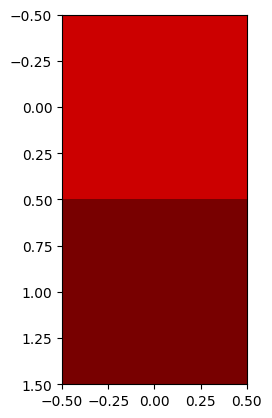

In [43]:
import matplotlib.pyplot as plt
color = [0.8, 0, 0]
color1 = [SPD(color, FR/0.9), SPD(color, FG/0.9), SPD(color, FB/0.9)]
print(color1)
plt.imshow([[color],[color1]])
plt.show()

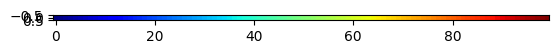

(0.9456327985739753, 0.029774872912127992, 0.0)


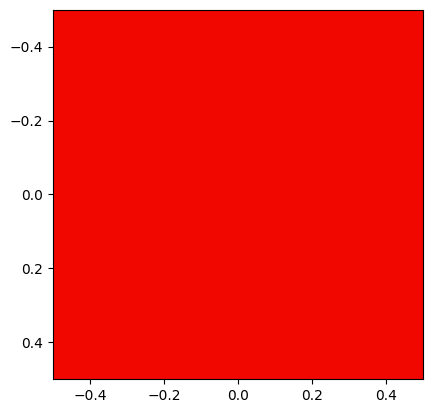

In [63]:
f_min = 3.8
f_max = 8.8
cmap = plt.get_cmap('jet')

f = np.linspace(f_min, f_max, 100)
rgb = cmap((f - f_min) / (f_max - f_min))

plt.imshow([rgb])
plt.show()

def freq_to_rgb(freq):
    return cmap((freq - f_min) / (f_max - f_min))[0:3]

plt.imshow([[freq_to_rgb(8.3)]])
print(freq_to_rgb(8.3))
plt.show()

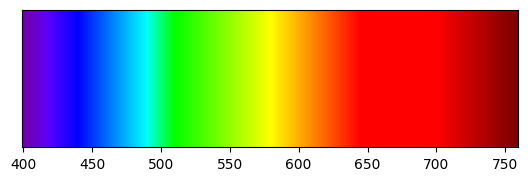

[0.5625, 0.0, 0.0]


In [72]:
#dWave为波长；maxPix为最大值；gamma为调教参数
def getRGB(dWave,maxPix=1,gamma=1):
    waveArea = [380,440,490,510,580,645,780]
    minusWave = [0,440,440,510,510,645,780]
    deltWave = [1,60,50,20,70,65,35]
    p = 0
    for i in range(len(waveArea)):
        if dWave<waveArea[p]:
            break
        p = p+1
    pVar = abs(minusWave[p]-dWave)/deltWave[p]
    rgbs = [[0,0,0],[pVar,0,1],[0,pVar,1],[0,1,pVar],
            [pVar,1,0],[1,pVar,0],[1,0,0],[0,0,0]]
        #在光谱边缘处颜色变暗
    if (dWave>=380) & (dWave<420):
        alpha = 0.3+0.7*(dWave-380)/(420-380)
    elif (dWave>=420) & (dWave<701):
        alpha = 1.0
    elif (dWave>=701) & (dWave<780):
        alpha = 0.3+0.7*(780-dWave)/(780-700)
    else:
        alpha = 0       #非可见区
    return [maxPix*(c*alpha)**gamma for c in rgbs[p]]

def drawSpec():
    pic = np.zeros([100,360,3])
    rgb = [getRGB(d) for d in range(400,760)]
    pic = pic+rgb
    plt.imshow(pic)
    plt.yticks([])      #隐藏y坐标轴
    plt.xticks(range(0,360,50),['400','450','500','550','600','650','700','750'])
    plt.show()
drawSpec()
print(getRGB(750))

-95.99799999999999 370.27799999999996
[0.80050545 0.79194208 0.7833787  0.77481532 0.76625194 0.75768856
 0.74912518 0.7405618  0.73199842 0.72343504 0.71487166 0.70630828
 0.6977449  0.68918152 0.68061815 0.67205477 0.66349139 0.65492801
 0.64636463 0.63780125 0.62923787 0.62067449 0.61211111 0.60354773
 0.59498435 0.58642097 0.57785759 0.56929421 0.56073084 0.55216746
 0.54360408 0.5350407  0.52647732 0.51791394 0.50935056 0.50078718
 0.4922238  0.48366042 0.47509704 0.46653366 0.45797028 0.44940691
 0.44084353 0.43228015 0.42371677 0.41515339 0.40659001 0.39802663
 0.38946325 0.38089987 0.37233649 0.36377311 0.35520973 0.34664635
 0.33808298 0.3295196  0.32095622 0.31239284 0.30382946 0.29526608
 0.2867027  0.27813932 0.26957594 0.26101256 0.25244918 0.2438858
 0.23532242 0.22675904 0.21819567 0.20963229 0.20106891 0.19250553
 0.18394215 0.17537877 0.16681539 0.15825201 0.14968863 0.14112525
 0.13256187 0.12399849 0.11543511 0.10687174 0.09830836 0.08974498
 0.0811816  0.07261822 0.

458.7416751737883


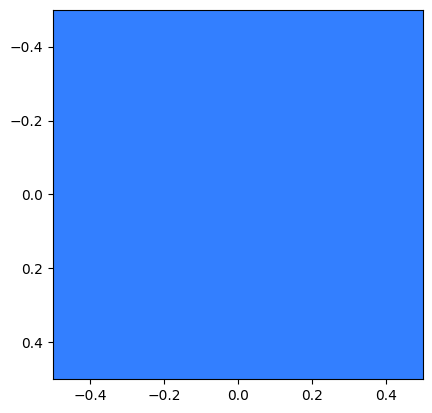

In [184]:
import matplotlib.pyplot as plt
import numpy as np
import colorsys as cs
# 定义波长范围
wavelength_min = 380
wavelength_max = 720
hue_min = -180
hue_max = 370

def wave_to_color(wavelength):
    # 计算波长范围对应的色相
    hue = (650 - wavelength) * 1.3714 
    hue = ((hue - hue_min) / (hue_max - hue_min) - 0.2) % 1
    return cs.hsv_to_rgb(hue , 1, 1)

def color_to_wave(color):
    hue = cs.rgb_to_hsv(color[0], color[1], color[2])[0]
    if hue > 0.9:
        res = (1 - hue + 0.2)*(hue_max - hue_min) + hue_min
        
    else:
        res = (hue + 0.2)*(hue_max - hue_min) + hue_min
    res = 650 - res/1.3714
    return res

wavelength = np.linspace(wavelength_min, wavelength_max, 100)
hue = (650 - wavelength) * 1.3714 
print(hue.min(), hue.max())
hue = ((hue - hue_min) / (hue_max - hue_min) - 0.2) % 1
print(hue)
rgb = []
for h in hue:
    rgb.append(cs.hsv_to_rgb(h , 1, 1))
rgb = np.array(rgb)

# 绘制光谱
plt.imshow([rgb])
plt.axis('off')
plt.show()

color_1 = [0.2, 0.5, 1]
hue_1 = cs.rgb_to_hsv(color_1[0], color_1[1], color_1[2])[0]
if hue_1 > 0.9:
    res = (1 - hue_1 + 0.2)*(hue_max - hue_min) + hue_min
else:
    res = (hue_1 + 0.2)*(hue_max - hue_min) + hue_min
res = 650 - res/1.3714
print(res)
plt.imshow([[color_1]])

In [291]:
wavelength_min = 380
wavelength_max = 720
hue_min = -180
hue_max = 370


def rgb_to_hsv(r, g, b):
    maxc = max(r, g, b)
    minc = min(r, g, b)
    v = maxc
    h  = 0.0
    if minc == maxc:
        h = 0.0
        s = 0.0
    else:
        s = (maxc-minc) / maxc
        rc = (maxc-r) / (maxc-minc)
        gc = (maxc-g) / (maxc-minc)
        bc = (maxc-b) / (maxc-minc)
        if r == maxc:
            h = bc-gc
        elif g == maxc:
            h = 2.0+rc-bc
        else:
            h = 4.0+gc-rc
        h = (h/6.0) % 1.0
    return h, s, v


def hsv_to_rgb(h, s, v):
    r1 = 0.0
    r2 = 0.0
    r3 = 0.0
    if s == 0.0:
        r1, r2, r3 = v, v, v
    
    i = int(h*6.0) # XXX assume int() truncates!
    f = (h*6.0) - i
    p = v*(1.0 - s)
    q = v*(1.0 - s*f)
    t = v*(1.0 - s*(1.0-f))
    i = i%6
    if i == 0:
        r1, r2, r3 = v, t, p
    if i == 1:
        r1, r2, r3 = q, v, p
    if i == 2:
        r1, r2, r3 = p, v, t
    if i == 3:
        r1, r2, r3 = p, q, v
    if i == 4:
        r1, r2, r3 = t, p, v
    if i == 5:
        r1, r2, r3 = v, p, q
    return r1, r2, r3



def wave_to_color(wavelength, saturation=1, value=1):
    hue_min = -180
    hue_max = 370
    # 计算波长范围对应的色相
    hue = 0.0
    hue = (650 - wavelength) * 1.3714 
    hue = ((hue - hue_min) / (hue_max - hue_min) - 0.2) % 1.0 
    return hsv_to_rgb(hue ,saturation, value)


def color_to_wave(color):
    hue, saturation, value = rgb_to_hsv(color[0], color[1], color[2])
    if 0.80 < hue < 0.875:
        hue = 0.80
    elif 0.875 <= hue < 0.95:
        hue = 0.95
    res = 0.0
    if hue > 0.9:
        res = (hue - 1 + 0.2)*(hue_max - hue_min) + hue_min
    else:
        res = (hue + 0.2)*(hue_max - hue_min) + hue_min
    res = 650 - res/1.3714
    return res, saturation, value


def Doppler(color, factor):
    wavelength, saturation, value = color_to_wave(color)
    wavelength = wavelength / factor
    if wavelength < 380:
        wavelength = 380
    elif wavelength > 720:
        wavelength = 720
    return wave_to_color(wavelength, saturation, value)

In [230]:
for wave in range(380, 721):
    hue = (650 - wave) * 1.3714 
    hue = ((hue - hue_min) / (hue_max - hue_min) - 0.2) % 1.0 
    color = wave_to_color(wave)
    wave2 = color_to_wave(color)

    print(wave, wave2, color, hue)




380 380.0 (0.8030327272727273, 0.0, 1) 0.8005054545454546
381 381.00000000000006 (0.7880719999999997, 0.0, 1) 0.7980119999999999
382 381.99999999999994 (0.7731112727272729, 0.0, 1) 0.7955185454545455
383 382.99999999999994 (0.7581505454545461, 0.0, 1) 0.793025090909091
384 383.99999999999994 (0.7431898181818184, 0.0, 1) 0.7905316363636363
385 384.99999999999994 (0.7282290909090907, 0.0, 1) 0.7880381818181819
386 385.9999999999999 (0.7132683636363648, 0.0, 1) 0.7855447272727274
387 386.99999999999994 (0.6983076363636371, 0.0, 1) 0.7830512727272729
388 388.0 (0.6833469090909094, 0.0, 1) 0.7805578181818182
389 388.99999999999994 (0.6683861818181827, 0.0, 1) 0.7780643636363638
390 390.0 (0.6534254545454541, 0.0, 1) 0.7755709090909091
391 391.0000000000001 (0.6384647272727264, 0.0, 1) 0.7730774545454544
392 392.0 (0.6235039999999996, 0.0, 1) 0.7705839999999999
393 393.0 (0.6085432727272728, 0.0, 1) 0.7680905454545455
394 394.0 (0.5935825454545451, 0.0, 1) 0.7655970909090908
395 395.0 (0.578

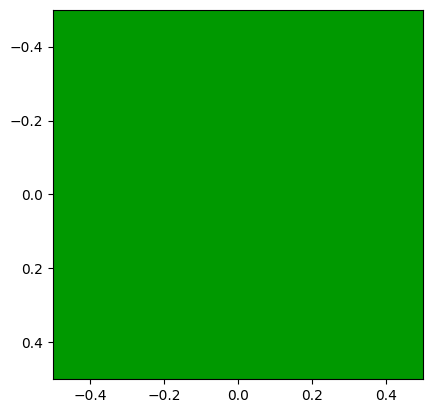

0.3333333333333333
(567.3593894317243, 1.0, 0.6)
(0.0, 0.6, 0.025337639077339966)


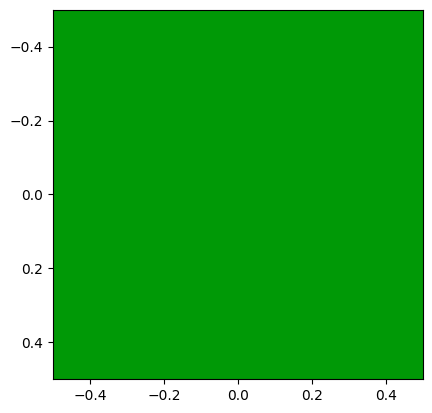

In [295]:
a  = [0,0.6,0]
plt.imshow([[a]])
plt.show()
hue = rgb_to_hsv(a[0], a[1], a[2])[0]
print(hue)
print(color_to_wave(a))
b = Doppler(a, 1.005)
print(b)
plt.imshow([[b]])

[0.8328640703311592, 0.8055305704500116, 0.2754246484400138] [0.8286133872951866, 0.845828864292039, 0.015309867408756728] [0.744027953694766, 0.4156367894598313, 0.8256004611907188]
637.478576037185 632.8155270328082 380.2027125565116
637.4275818306385 666.121607402956 400.21338163843325


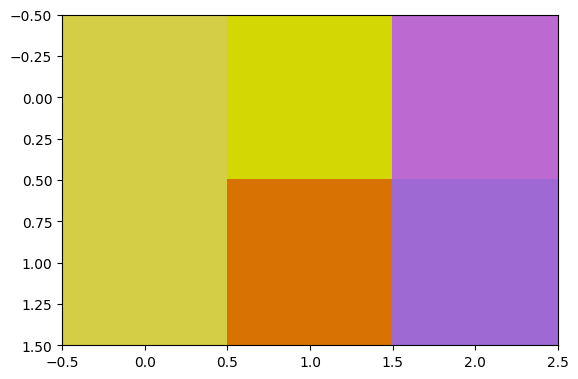

In [288]:
import random
color1 = [random.random(), random.random(), random.random()]
color2 = [random.random(), random.random(), random.random()]
color3 = [random.random(), random.random(), random.random()]
plt.imshow([[color1, color2, color3], [Doppler(color1, 1.000080), Doppler(color2, 0.95), Doppler(color3, 0.95)]])
print(color1, color2, color3)
print(color_to_wave(color1)[0], color_to_wave(color2)[0], color_to_wave(color3)[0])
print(color_to_wave(Doppler(color1, 1.000080))[0], color_to_wave(Doppler(color2, 0.95))[0], color_to_wave(Doppler(color3, 0.95))[0])

In [292]:
Doppler([1,1,1], 1.000100)

(1, 1.0, 1.0)